# Прогнозирование оттока клиентов в сети отелей «Как в гостях»

***Описание проекта.***  

Заказчик исследования — сеть отелей «Как в гостях». Чтобы привлечь клиентов, сеть отелей добавила на свой сайт возможность забронировать номер без предоплаты. Однако если клиент отменяет бронирование, то компания терпит убытки. Сотрудники отеля могут, например, закупить продукты к приезду гостя или просто не успеть найти другого клиента.  
Чтобы решить эту проблему, нам нужно разработать систему, которая предсказывает отказ от брони. Если модель покажет, что бронь будет отменена, то клиенту предлагается внести депозит. Размер депозита — 80% от стоимости номера за одни сутки и затрат на разовую уборку. Деньги будут списаны со счёта клиента, если он всё же отменит бронь.  

***Бизнес-метрика и другие данные:***

Основная бизнес-метрика для любой сети отелей — её прибыль. Прибыль отеля — это разница между стоимостью номера за все ночи и затраты на обслуживание: как при подготовке номера, так и при проживании постояльца. В отеле есть несколько типов номеров. В зависимости от типа номера назначается стоимость за одну ночь. Есть также затраты на уборку. Если клиент снял номер надолго, то убираются каждые два дня. Стоимость номеров отеля:  
- категория A: за ночь — 1 000, разовое обслуживание — 400;  
- категория B: за ночь — 800, разовое обслуживание — 350;  
- категория C: за ночь — 600, разовое обслуживание — 350;  
- категория D: за ночь — 550, разовое обслуживание — 150;  
- категория E: за ночь — 500, разовое обслуживание — 150;   
- категория F: за ночь — 450, разовое обслуживание — 150;  
- категория G: за ночь — 350, разовое обслуживание — 150.  

В ценовой политике отеля используются сезонные коэффициенты: весной и осенью цены повышаются на 20%, летом — на 40%. На разработку системы прогнозирования заложен бюджет — 400 000. При этом необходимо учесть, что внедрение модели должно окупиться за год. Затраты на разработку должны быть меньше той выручки, которую система принесёт компании.

**Постановка задачи.**  

Разработать модель предсказывающую отказ клиентом брони. Задача классификации.  
Сравнить прибыль отеля до и после внедрения депозита.


**План проведения работы**

Шаг 1. Открыть файлы с данными

Шаг 2. Предобработка и исследовательский анализ данных. Проверить данные и откорректировать их, если потребуется. Провести исследовательский анализ представленных данных.

Шаг 3. Вычислить бизнес-метрику. Оценим прибыль отеля без внедрения депозитов.

Шаг 4. Разработка модели ML: обучить разные модели и оценить их качество кросс-валидацией. Выбрать лучшую модель и проверить её на тестовой выборке. Выбрать метрику для обучения. Оценить прибыль, которую принесёт выбранная модель за год.

Шаг 5. Выявить признаки «ненадёжного» клиента. На основе исследовательского анализа данных опишем клиента, склонного к отказу от брони.

Шаг 6. Напишем общий вывод:описать модель, которая решает задачу с наибольшей выгодой для бизнеса. Выдать бизнесу рекомендации по результатам проделанной работы.

***Описание данных***  

В таблицах hotel_train и hotel_test содержатся одинаковые столбцы:

- `id` — номер записи;
- `adults` — количество взрослых постояльцев;
- `arrival_date_year` — год заезда;
- `arrival_date_month` — месяц заезда;
- `arrival_date_week_number` — неделя заезда;
- `arrival_date_day_of_month` — день заезда;
- `babies` — количество младенцев;
- `booking_changes` — количество изменений параметров заказа;
- `children` — количество детей от 3 до 14 лет;
- `country` — гражданство постояльца;
- `customer_type` — тип заказчика:  
    - Contract — договор с юридическим лицом;  
    - Group — групповой заезд;  
    - Transient — не связано с договором или групповым заездом;  
    - Transient-party — не связано с договором или групповым заездом, но связано с бронированием типа Transient.  
- `days_in_waiting_list` — сколько дней заказ ожидал подтверждения;
- `distribution_channel` — канал дистрибуции заказа;
- `is_canceled` — отмена заказа;
- `is_repeated_guest` — признак того, что гость бронирует номер второй раз;
- `lead_time` — количество дней между датой бронирования и датой прибытия;
- `meal` — опции заказа:  
    - SC — нет дополнительных опций;  
    - BB — включён завтрак;  
    - HB — включён завтрак и обед;  
    - FB — включён завтрак, обед и ужин.  
- `previous_bookings_not_canceled` — количество подтверждённых заказов у клиента;
- `previous_cancellations` — количество отменённых заказов у клиента;
- `required_car_parking_spaces` — необходимость места для автомобиля;
- `reserved_room_type` — тип забронированной комнаты;
- `stays_in_weekend_nights` — количество ночей в выходные дни;
- `stays_in_week_nights` — количество ночей в будние дни;
- `total_nights` — общее количество ночей;
- `total_of_special_requests` — количество специальных отметок.

### Шаг 1. Откройте файлы с данными

#### Откроем и сохраним файл данных

Установим дополнительную библиотеки.

In [1]:
pip install -U ydata-profiling

Note: you may need to restart the kernel to use updated packages.


In [2]:
!pip install --upgrade Pillow

In [3]:
!pip install category_encoders

Импортируем нужные библиотеки

In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from ydata_profiling import ProfileReport

from statsmodels.stats.outliers_influence import variance_inflation_factor


from sklearn.preprocessing import OneHotEncoder
import category_encoders as ce
from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import GridSearchCV

from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

#import warnings
#warnings.filterwarnings('ignore')

In [5]:
# Установим опцию по выводу всех колонок dataframe
pd.set_option('display.max_columns', None)

Объявим глобальные переменные:

In [6]:
# случайное зерно
SEED = 45321

In [7]:
# Открываем и сохраняем файлы hotel_train.csv и hotel_test в датафрейм из директории или по ссылке:
try:
    hc_train = pd.read_csv('/datasets/hotel_train.csv')
    hc_test  = pd.read.csv('/datasets/hotel_test.csv')
except:
    hc_train = pd.read_csv('https://code.s3.yandex.net/datasets/hotel_train.csv')
    hc_test  = pd.read_csv('https://code.s3.yandex.net/datasets/hotel_test.csv')

In [8]:
hc_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65229 entries, 0 to 65228
Data columns (total 25 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              65229 non-null  int64  
 1   is_canceled                     65229 non-null  int64  
 2   lead_time                       65229 non-null  float64
 3   arrival_date_year               65229 non-null  int64  
 4   arrival_date_month              65229 non-null  object 
 5   arrival_date_week_number        65229 non-null  int64  
 6   arrival_date_day_of_month       65229 non-null  int64  
 7   stays_in_weekend_nights         65229 non-null  int64  
 8   stays_in_week_nights            65229 non-null  int64  
 9   adults                          65229 non-null  float64
 10  children                        65229 non-null  float64
 11  babies                          65229 non-null  float64
 12  meal                            

In [9]:
hc_train.head()

,id,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,booking_changes,days_in_waiting_list,customer_type,required_car_parking_spaces,total_of_special_requests,total_nights
0,0,0,7.0,2015,July,27,1,0,1,1.0,0.0,0.0,BB,GBR,Direct,0,0,0,A,0,0,Transient,0,0,1
1,1,0,14.0,2015,July,27,1,0,2,2.0,0.0,0.0,BB,GBR,TA/TO,0,0,0,A,0,0,Transient,0,1,2
2,2,0,0.0,2015,July,27,1,0,2,2.0,0.0,0.0,BB,PRT,Direct,0,0,0,C,0,0,Transient,0,0,2
3,3,0,9.0,2015,July,27,1,0,2,2.0,0.0,0.0,FB,PRT,Direct,0,0,0,C,0,0,Transient,0,1,2
4,4,1,85.0,2015,July,27,1,0,3,2.0,0.0,0.0,BB,PRT,TA/TO,0,0,0,A,0,0,Transient,0,1,3


В датасете hc_train 25 столбцов и 65229 записей. Датасет содержит данные для обучения модели:

`id` — уникальный идентификатор клиента;  
`is_canceled` - целевой признак(`target`);  
Все остальные столбцы - потенциальные признаки, из которых необходимо отобрать те, которые будут влиять на целевой.  
Столбцы датафрейма имеют тип object, int64 и float64. Пропусков нет.  

In [10]:
hc_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32412 entries, 0 to 32411
Data columns (total 25 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              32412 non-null  int64  
 1   is_canceled                     32412 non-null  int64  
 2   lead_time                       32412 non-null  float64
 3   arrival_date_year               32412 non-null  int64  
 4   arrival_date_month              32412 non-null  object 
 5   arrival_date_week_number        32412 non-null  int64  
 6   arrival_date_day_of_month       32412 non-null  int64  
 7   stays_in_weekend_nights         32412 non-null  int64  
 8   stays_in_week_nights            32412 non-null  int64  
 9   adults                          32412 non-null  float64
 10  children                        32412 non-null  float64
 11  babies                          32412 non-null  float64
 12  meal                            

In [11]:
hc_test.head()

,id,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,booking_changes,days_in_waiting_list,customer_type,required_car_parking_spaces,total_of_special_requests,total_nights
0,6086,1,74.0,2017,January,1,1,1,0,2.0,0.0,0.0,BB,PRT,TA/TO,0,0,0,A,0,0,Transient,0,0,1
1,6087,1,62.0,2017,January,1,1,2,2,2.0,0.0,0.0,BB,AUT,TA/TO,0,0,0,A,0,0,Transient,0,1,4
2,6088,1,62.0,2017,January,1,1,2,2,2.0,0.0,0.0,BB,AUT,TA/TO,0,0,0,A,0,0,Transient,0,1,4
3,6089,1,71.0,2017,January,1,1,2,2,1.0,0.0,0.0,BB,PRT,TA/TO,0,0,0,A,0,0,Transient,0,1,4
4,6090,1,172.0,2017,January,1,1,2,5,2.0,0.0,0.0,BB,BEL,TA/TO,0,0,0,A,0,0,Transient,0,0,7


В датасете hc_train 25 столбцов и 32412 записей. Датасет содержит данные для тестирования модели:

`id` — уникальный идентификатор клиента;  
`is_canceled` - целевой признак(`target`);  
Все остальные столбцы - потенциальные признаки, из которых необходимо отобрать те, которые будут влиять на целевой.  
Столбцы датафрейма имеют тип object, int64 и float64. Пропусков нет.

***Вывод***  
Оба датасета абсолютно симметричные (все признаки присутствуют в обоих датасетах)), типы данных (object, int64 и float64) одинаковы, пропусков нет. 

### Шаг 2. Предобработка и исследовательский анализ данных

#### Предобработка и первичный анализ данных

для EDA воспользуемся библиотекой ydata_profiling.

In [12]:
ProfileReport(hc_train)

In [13]:
ProfileReport(hc_test)

***Вывод:***
- В тренеровочной выборке данные за два года 2015 и 2016. В тестовой выборке за 8 месяцев 2017 года.
- в целевом признаке `is_canseled` на тренировачном датасете отказов 36.9%, на тестовом датафрейме 38.8%
- Явных дубликатов нет.
- Пропусков в датасетах нет.
- Среднее время между бронированием и заездом составляет чуть более трех месяцев( на train - 96 дней, на test - 98 дней)
- В обеих выборках имеются брони без взрослых(169 и 69 соответственно) выбросы/ошибки в данных. К удалению.
- В тренеровочной выборке в столбце `babies` (дети до 3 лет) есть брони с 10-ю и 9-ю детьми. Ясли на выезде? Такого явно не бывает на одну бронь. Явные выбросы/ошибки. Удаляем.
- В столбце `meal` в обеих выборках выявлен не явный дубликат. `SC` и `SC_` лишний пробел. Поправим.
- Топ три постояльцев в обех выборках имею гражданство Португалии, Великобритании и Франции. В обеих выборках свыше 30%  от общего числа клиентов - граждане Португалии.
- В более 70% процентов случаев клиент бронирует номера категории А в обеих выборках.
- В большинстве случаев (70% и 85% для выборок соответственно) тип заказчика не связан с договором или групповым заездом.
- В 95% случаев клиенту не нужно парковочное место.
- Среднеарефмитическая бронь клиента - на 3 ночи.
- Столбец `id`- номер записи - никакой информативности не несет. Удаляем его.

In [14]:
old_shape_train = hc_train.shape[0] # потом сравним сколько данных удалили
old_shape_test = hc_test.shape[0]

In [15]:
# В столбце `babies` есть по одному значению больше 3-х.Удаляем:
hc_train.drop(hc_train[hc_train['babies'] > 3].index, inplace=True)
print('Кол-во детей до 3 лет, больше 3-х:', hc_train.query('babies > 2').shape[0])

Кол-во детей до 3 лет, больше 3-х: 0


In [16]:
# Удаляем брони без взрослых:
hc_train.drop(hc_train.query('adults == 0').index, inplace=True)
hc_test.drop(hc_test.query('adults == 0').index, inplace=True)
print('брони без взрослых hc_train:', hc_train.query('adults == 0').shape[0])
print('брони без взрослых hc_test:', hc_test.query('adults == 0').shape[0])

брони без взрослых hc_train: 0
брони без взрослых hc_test: 0


In [17]:
# Исправляем не явные дубликаты:
hc_train['meal'] = hc_train['meal'].str.strip()
hc_test['meal'] = hc_test['meal'].str.strip()
print('Для выборки hc_train:', sorted(hc_train['meal'].unique()))
print('Для выборки hc_test:', sorted(hc_test['meal'].unique()))

Для выборки hc_train: ['BB', 'FB', 'HB', 'SC']
Для выборки hc_test: ['BB', 'FB', 'HB', 'SC']


Обновляем индексы

In [18]:
hc_train.reset_index(drop=True, inplace=True)
hc_test.reset_index(drop=True, inplace=True)

In [19]:
# Проверяем:
hc_train.info()
hc_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65061 entries, 0 to 65060
Data columns (total 25 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              65061 non-null  int64  
 1   is_canceled                     65061 non-null  int64  
 2   lead_time                       65061 non-null  float64
 3   arrival_date_year               65061 non-null  int64  
 4   arrival_date_month              65061 non-null  object 
 5   arrival_date_week_number        65061 non-null  int64  
 6   arrival_date_day_of_month       65061 non-null  int64  
 7   stays_in_weekend_nights         65061 non-null  int64  
 8   stays_in_week_nights            65061 non-null  int64  
 9   adults                          65061 non-null  float64
 10  children                        65061 non-null  float64
 11  babies                          65061 non-null  float64
 12  meal                            

Удаление выбросов/ ошибок сократило наши датасеты на 0.3%.

In [20]:
# Удаляем id:
hc_train.drop(columns='id', inplace=True)
hc_test.drop(columns='id', inplace=True)

In [21]:
hc_train.duplicated().sum()

21375

In [22]:
print(f"Было удалено {(old_shape_train / hc_train.shape[0] - 1):.3%} данных в тренировочной выборке")
print(f"Было удалено {(old_shape_test / hc_test.shape[0] - 1):.3%} данных в тестовой выборке")

Было удалено 0.258% данных в тренировочной выборке
Было удалено 0.213% данных в тестовой выборке


In [23]:
hc_train[hc_train.duplicated(keep='first')]

,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,booking_changes,days_in_waiting_list,customer_type,required_car_parking_spaces,total_of_special_requests,total_nights
13,0,72.0,2015,July,27,1,2,4,2.0,0.0,0.0,BB,PRT,Direct,0,0,0,A,1,0,Transient,0,1,6
85,1,5.0,2015,July,28,5,1,0,2.0,0.0,0.0,BB,PRT,TA/TO,0,0,0,D,0,0,Transient,0,0,1
115,0,0.0,2015,July,28,7,0,1,1.0,0.0,0.0,BB,GBR,TA/TO,0,0,0,A,0,0,Transient,0,3,1
127,1,1.0,2015,July,28,8,0,1,2.0,0.0,0.0,BB,PRT,Corporate,0,0,0,A,0,0,Transient,0,1,1
219,0,40.0,2015,July,29,13,1,4,2.0,0.0,0.0,BB,ESP,Direct,0,0,0,D,0,0,Transient,0,2,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65020,0,269.0,2016,December,53,29,2,3,1.0,0.0,0.0,BB,SWE,TA/TO,0,0,0,A,0,0,Transient-Party,0,0,5
65021,0,269.0,2016,December,53,29,2,3,1.0,0.0,0.0,BB,SWE,TA/TO,0,0,0,A,0,0,Transient-Party,0,0,5
65024,0,269.0,2016,December,53,29,2,3,1.0,0.0,0.0,BB,SWE,TA/TO,0,0,0,A,0,0,Transient-Party,0,0,5
65025,0,269.0,2016,December,53,29,2,3,1.0,0.0,0.0,BB,SWE,TA/TO,0,0,0,A,0,0,Transient-Party,0,1,5


In [24]:
hc_test.duplicated().sum()

7713

После удаления столбца `id`(повторяющий индексацию) выявились дубликаты в данных обеих выборок. Возможно, что несколько бронирований с одинаковыми функциями были сделаны в один и тот же день. Поскольку у нас нет такого столбца, как "идентификатор бронирования", мы не можем с уверенностью сказать, что это настоящие дубликаты, что делает удаление этих "дубликатов" сомнительным. Проверить наверняка мы это не можем, поэтому оставим всё как есть.

#### Корреляция данных

In [25]:
hc_train.hist(figsize = (15, 15));

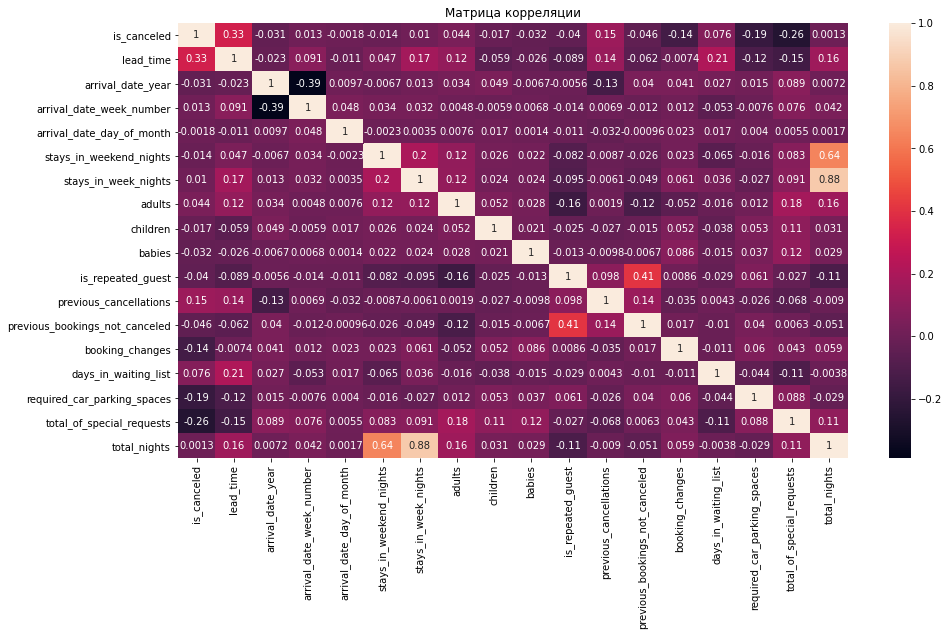

In [26]:
# для всех признаков относительно целевого.

plt.figure(figsize=(15,8))
sns.heatmap(hc_train.corr(), annot = True)
plt.title('Матрица корреляции')
plt.show()

#Проверим данные на мультиколлинеарность, изучив фактор инфляции дисперсии (VIF). VIF больше 5 говорит о высокой степени коллинеарности.#

In [27]:
# Предотвращение появления предупреждающего сообщения о делении на ноль:
#np.seterr(divide='ignore', invalid='ignore')

In [28]:
#np.seterr(divide='ignore', invalid='ignore')

#numeric = list(hc_train.select_dtypes('number').columns)

#pd.Series(
#    [variance_inflation_factor(hc_train[numeric].values, i) for i in range(hc_train[numeric].shape[1])],
#    index=hc_train[numeric].columns
#)

Столбцы `stays_in_week_nights`, `stays_in_weekend_nights` и `total_nights` - мультиколлинеарными. Для корректной работы линейных моделей следует избавиться от одного. При выборе признаков для модели не будем использовать `total_nights`. Так же в признаках не будут использоваться столбцы года и дня месяца заказа, так как информация изменяется в зависимости от сезона. В разделе формирования задачи на основе бизнес-модели преобразуем эти данные в сезоны. Столбец `adults` оставляем (нет явной зависимости от других столбцов, бронь разместить может только взрослый клиент).

**Корреляции между Признаками и Статусом отмены заказа**

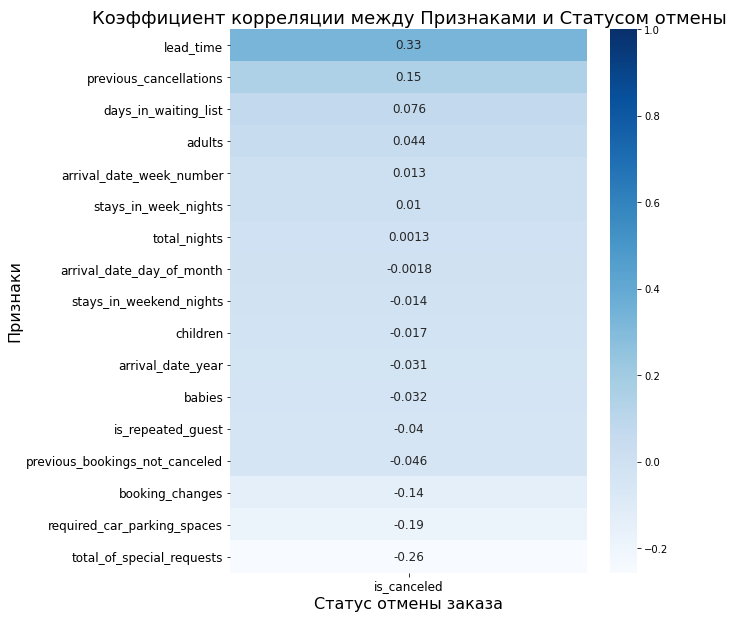

In [29]:
fig = plt.figure(figsize=(8,10))
ax = sns.heatmap(hc_train.corr()[['is_canceled']].sort_values('is_canceled', ascending=False),
                 annot = True,
                 annot_kws = {"size":12},
                 cmap='Blues')
ax.set_title('Коэффициент корреляции между Признаками и Статусом отмены', fontsize=18)
ax.set_xlabel('Статус отмены заказа', fontsize = 16)
ax.set_ylabel('Признаки', fontsize = 16)
ax.tick_params(axis = "both", labelsize = 12);
y_min, y_max = ax.get_ylim()
ax.set_ylim(top=y_max+1)
plt.show()

Наиболее сильная связь наблюдается между Стаусом отены заказа - `is_canceled` и следующими факторами:  
- `lead_time`- (0,33) - коэффициент корреляции свидетельствует о наличии прямой слабой связи между отменой бронирования и временем между совершением бронирования и планируемой датой заселения в отель: чем больше времени между совершением бронирования, тем выше вероятность отмены;  
- `total_of_special_requests` -(-0,26) - слабая обратная связь между количеством специальных пожеланий клиента к номеру
и отменой бронирования: чем больше клиент оставляет специальных пожеланий к номеру, тем меньше вероятность, что гость отменит бронирование;  
- `required_car_parking_spaces` - (-0,19) - слабая обратная связь есть между количеством требующихся клиенту парковочных мест и отменой бронирования (парковочные места часто указывают гости, относящиеся к категории «Группа», когда бронирование совершается сразу на несколько человек);  
- `booking_changes` - (-0,14) - коэффициент корреляции –0,14 говорит о наличии слабой обратной связи между изменениями, несенными в бронь, и отменой бронирования: чем больше изменений и дополнений клиент внес в бронь, тем меньше вероятность, что он отменит бронирование;
- `previous_cancellations` - (0,15), свидетельствует о наличии прямой слабой связи между отменой бронирования и количеством бронирований, отмененных клиентом ранее: чем больше броней ранее отменял клиент, тем выше вероятность,что бронирование будет отменено.

### Шаг 3. Формулировка ML-задачи на основе бизнес-задачи

Основная бизнес-метрика для любой сети отелей — её прибыль. Прибыль отеля — это разница между стоимостью номера за все ночи и затраты на обслуживание: как при подготовке номера, так и при проживании постояльца. В отеле есть несколько типов номеров. В зависимости от типа номера назначается стоимость за одну ночь. Есть также затраты на уборку. Если клиент снял номер надолго, то убираются каждые два дня. Стоимость номеров отеля:  
- категория A: за ночь — 1 000, разовое обслуживание — 400;  
- категория B: за ночь — 800, разовое обслуживание — 350;  
- категория C: за ночь — 600, разовое обслуживание — 350;  
- категория D: за ночь — 550, разовое обслуживание — 150;  
- категория E: за ночь — 500, разовое обслуживание — 150;   
- категория F: за ночь — 450, разовое обслуживание — 150;  
- категория G: за ночь — 350, разовое обслуживание — 150.  

В ценовой политике отеля используются сезонные коэффициенты: весной и осенью цены повышаются на 20%, летом — на 40%. На разработку системы прогнозирования заложен бюджет — 400 000. При этом необходимо учесть, что внедрение модели должно окупиться за год. Затраты на разработку должны быть меньше той выручки, которую система принесёт компании.

**Рассчитаем прибыльность за отчетный период на основе предоставленных условий**

In [30]:
#Создадим отдельный датасет с нужными признаками
hc_profit = hc_test[['is_canceled', 'arrival_date_month', 'reserved_room_type', 'total_nights']]

In [31]:
#Добавим к получившейся таблице значения стоимости комнат и обслуживания
room_dict = pd.DataFrame({'reserved_room_type' : [i for i in sorted(hc_profit.reserved_room_type.unique())],
                         'price_per_night' : [1000, 800, 600, 550, 500, 450, 350],
                         'service_price' : [400, 350, 350, 150, 150, 150, 150]})
hc_profit = hc_profit.merge(room_dict, on='reserved_room_type', how='left')

In [32]:
#Добавим коэффициенты по сезону
month_dict = pd.DataFrame({'arrival_date_month' : [i for i in hc_profit.arrival_date_month.unique()],
                          'koeff' : [1, 1, 1.2, 1.2, 1.2, 1.4, 1.4, 1.4]})
hc_profit = hc_profit.merge(month_dict, on='arrival_date_month', how='left')

In [33]:
hc_profit.sample(5)

,is_canceled,arrival_date_month,reserved_room_type,total_nights,price_per_night,service_price,koeff
5695,0,May,A,2,1000,400,1.2
28020,0,June,D,3,550,150,1.4
1424,1,June,A,2,1000,400,1.4
25332,0,April,A,7,1000,400,1.2
24511,0,April,A,3,1000,400,1.2


In [34]:
#Далее создадим функцию для рассчета прибыли и убытка в зависимости от отмены брони
def profit(data):
    if data['is_canceled'] == 0:
        income = data['price_per_night'] * data['koeff'] * data['total_nights']
        expenses = data['service_price'] * (1 + data['total_nights'] // 2)
    else:
        income = 0
        expenses = data['service_price'] + (data['price_per_night'] * data['koeff'])
    profit = income - expenses
    return profit

In [35]:
hc_profit['total_profit'] = hc_profit.apply(profit, axis=1)

In [36]:
display(hc_profit)
profit_without_deposite = hc_profit['total_profit'].sum()/1000000
print('Прибыль с января по август 2017 г. без депозита составляет:', profit_without_deposite, 'млн.руб.')

,is_canceled,arrival_date_month,reserved_room_type,total_nights,price_per_night,service_price,koeff,total_profit
0,1,January,A,1,1000,400,1.0,-1400.0
1,1,January,A,4,1000,400,1.0,-1400.0
2,1,January,A,4,1000,400,1.0,-1400.0
3,1,January,A,4,1000,400,1.0,-1400.0
4,1,January,A,7,1000,400,1.0,-1400.0
...,...,...,...,...,...,...,...,...
32338,0,August,A,6,1000,400,1.4,6800.0
32339,0,August,A,7,1000,400,1.4,8200.0
32340,0,August,A,7,1000,400,1.4,8200.0
32341,0,August,D,7,550,150,1.4,4790.0


Прибыль с января по август 2017 г. без депозита составляет: 32.51059 млн.руб.


**Вывод:**
прибыль за 2017 год (тестовый датафрейм) составила 32.51059 млн.руб.

### Шаг 4. Разработка модели ML

#### Подготовка данных.

Разделим на признаки датафремы исключив следующие столбцы `id`,`arrival_date_year`, `arrival_date_month`, `arrival_date_day_of_month`, `total_nights`:

При оставлении столбца `arrival_date_month` в среднем все модели просели от 1,5% до 2% процентов по показателям метрик. Столбец `total_nights`- удаляем для избежания проблемы мультиколлериальности, а так в датафрейме у нас остаются столбцы `stays_in_weekend_nights` и `stays_in_week_nights`, которые в сумме и дают этот столбец. По-видимому столбец `total_nights` введен для облегчения расчетов прибыли.
</font>
</div>

In [37]:
#Делим датафреймы на признаки и целевые признаки:

# Датафрейм hc_train:
features_train = hc_train.drop(['is_canceled', 'arrival_date_year', 'arrival_date_day_of_month',
                                'arrival_date_month', 'total_nights'], axis=1)
target_train = hc_train['is_canceled']

# Датафрейм hc_test:
features_test = hc_test.drop(['is_canceled', 'arrival_date_year', 'arrival_date_day_of_month',
                              'arrival_date_month', 'total_nights'], axis=1)
target_test = hc_test['is_canceled']

In [38]:
features_train.tail()

,lead_time,arrival_date_week_number,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,booking_changes,days_in_waiting_list,customer_type,required_car_parking_spaces,total_of_special_requests
65056,23.0,53,2,4,2.0,0.0,0.0,BB,CHN,TA/TO,0,0,0,D,0,0,Transient,0,2
65057,53.0,53,2,3,2.0,0.0,0.0,HB,FRA,TA/TO,0,0,0,D,0,0,Transient,0,3
65058,7.0,53,2,4,2.0,0.0,0.0,BB,FRA,TA/TO,0,0,0,D,0,0,Transient,0,1
65059,17.0,53,2,5,2.0,0.0,0.0,SC,FRA,TA/TO,0,0,0,A,0,0,Transient,0,1
65060,107.0,53,2,5,2.0,0.0,0.0,BB,FRA,TA/TO,0,0,0,A,0,0,Transient,0,0


In [39]:
target_train.tail()

65056    0
65057    0
65058    0
65059    0
65060    0
Name: is_canceled, dtype: int64

#### Масштабируем признаки методом стандартизации.

In [40]:
numeric = [*features_train.select_dtypes(exclude=['object']).columns]
numeric.remove('is_repeated_guest')
numeric.remove('babies')
numeric.remove('children')
scaler = StandardScaler()
scaler.fit(features_train[numeric])
features_train[numeric] = scaler.transform(features_train[numeric])
features_test[numeric] = scaler.transform(features_test[numeric])

In [41]:
features_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65061 entries, 0 to 65060
Data columns (total 19 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   lead_time                       65061 non-null  float64
 1   arrival_date_week_number        65061 non-null  float64
 2   stays_in_weekend_nights         65061 non-null  float64
 3   stays_in_week_nights            65061 non-null  float64
 4   adults                          65061 non-null  float64
 5   children                        65061 non-null  float64
 6   babies                          65061 non-null  float64
 7   meal                            65061 non-null  object 
 8   country                         65061 non-null  object 
 9   distribution_channel            65061 non-null  object 
 10  is_repeated_guest               65061 non-null  int64  
 11  previous_cancellations          65061 non-null  float64
 12  previous_bookings_not_canceled  

#### Перевод категориальных признаков в численные.

In [42]:
#Кодировка с помощью Binary Encoder
binary = ce.BinaryEncoder()
binary.fit(features_train)
features_train = binary.transform(features_train)
features_test = binary.transform(features_test)

In [43]:
features_train.tail()

,lead_time,arrival_date_week_number,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal_0,meal_1,meal_2,country_0,country_1,country_2,country_3,country_4,country_5,country_6,country_7,distribution_channel_0,distribution_channel_1,distribution_channel_2,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type_0,reserved_room_type_1,reserved_room_type_2,booking_changes,days_in_waiting_list,customer_type_0,customer_type_1,customer_type_2,required_car_parking_spaces,total_of_special_requests
65056,-0.762613,1.608962,1.377241,1.310210,0.336436,0.0,0.0,0,0,1,0,0,0,1,1,1,1,0,0,1,0,0,-0.133707,-0.081287,0,1,1,-0.326674,-0.183057,0,0,1,-0.244332,1.979182
65057,-0.450682,1.608962,1.377241,0.572362,0.336436,0.0,0.0,0,1,1,0,0,0,0,0,1,0,1,0,1,0,0,-0.133707,-0.081287,0,1,1,-0.326674,-0.183057,0,0,1,-0.244332,3.309041
65058,-0.928977,1.608962,1.377241,1.310210,0.336436,0.0,0.0,0,0,1,0,0,0,0,0,1,0,1,0,1,0,0,-0.133707,-0.081287,0,1,1,-0.326674,-0.183057,0,0,1,-0.244332,0.649323
65059,-0.825000,1.608962,1.377241,2.048058,0.336436,0.0,0.0,1,0,0,0,0,0,0,0,1,0,1,0,1,0,0,-0.133707,-0.081287,0,0,1,-0.326674,-0.183057,0,0,1,-0.244332,0.649323
65060,0.110795,1.608962,1.377241,2.048058,0.336436,0.0,0.0,0,0,1,0,0,0,0,0,1,0,1,0,1,0,0,-0.133707,-0.081287,0,0,1,-0.326674,-0.183057,0,0,1,-0.244332,-0.680536


In [44]:
features_test.head()

,lead_time,arrival_date_week_number,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal_0,meal_1,meal_2,country_0,country_1,country_2,country_3,country_4,country_5,country_6,country_7,distribution_channel_0,distribution_channel_1,distribution_channel_2,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type_0,reserved_room_type_1,reserved_room_type_2,booking_changes,days_in_waiting_list,customer_type_0,customer_type_1,customer_type_2,required_car_parking_spaces,total_of_special_requests
0,-0.232330,-2.254351,0.205356,-1.641182,0.336436,0.0,0.0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,-0.133707,-0.081287,0,0,1,-0.326674,-0.183057,0,0,1,-0.244332,-0.680536
1,-0.357102,-2.254351,1.377241,-0.165486,0.336436,0.0,0.0,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,-0.133707,-0.081287,0,0,1,-0.326674,-0.183057,0,0,1,-0.244332,0.649323
2,-0.357102,-2.254351,1.377241,-0.165486,0.336436,0.0,0.0,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,-0.133707,-0.081287,0,0,1,-0.326674,-0.183057,0,0,1,-0.244332,0.649323
3,-0.263523,-2.254351,1.377241,-0.165486,-1.783139,0.0,0.0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,-0.133707,-0.081287,0,0,1,-0.326674,-0.183057,0,0,1,-0.244332,0.649323
4,0.786647,-2.254351,1.377241,2.048058,0.336436,0.0,0.0,0,0,1,0,0,0,0,1,0,1,0,0,1,0,0,-0.133707,-0.081287,0,0,1,-0.326674,-0.183057,0,0,1,-0.244332,-0.680536


In [45]:
# Используем технику OneHotEncoder:
#ohe = OneHotEncoder(handle_unknown='ignore',sparse=False)
#feature_arr = ohe.fit_transform(hc_train[hc_train.select_dtypes(include=['object']).columns])
#feature_labels = ohe.get_feature_names(hc_train.select_dtypes(include = ['object']).columns)
#ohe_train = pd.DataFrame(feature_arr, columns=feature_labels)
# Проверяем:
#ohe_train.head()

In [46]:
#features_arr = ohe.transform(hc_test[hc_test.select_dtypes(include=['object']).columns])
#ohe_test = pd.DataFrame(features_arr,columns=feature_labels)
# Проверяем:
#ohe_test.tail()

In [47]:
#print('Кол-во строк и столбцов в ohe обучающей выборке:', ohe_train.shape)
#print('Кол-во строк и столбцов в ohe тестовой выборке:', ohe_test.shape)

Создадим доп массивы сразу без категориальных столбцов и соединим по индексам с закодированным массивом, предварительно проверив количество строк и столбцов, чтобы потом быть уверенными, что соединилось все правильно:

In [48]:
#tn = features_train[features_train.select_dtypes(include=['int','float']).columns]
#tt = features_test[features_test.select_dtypes(include=['int','float']).columns]

In [49]:
#print('Кол-во строк и столбцов t выборке:', tn.shape)
#print('Кол-во строк и столбцов m выборке:', tt.shape)

In [50]:
#features_train = tn.join(ohe_train)

In [51]:
#features_test = tt.join(ohe_test)

In [52]:
#print('Кол-во столбцов в обучающей выборке:',features_train.shape)
#print('Кол-во столбцов в тестовой выборке:', features_test.shape)

In [53]:
#features_train.tail()

In [54]:
#features_test.tail()

#### Выбор лучшей модели

Обучим разные модели и оценим их качество кросс-валидацией. Выберем лучшую модель и проверим её на тестовой выборке.

Поскольку данные не сильно дисбалансированы, будем использовать метрики F1, Accuracy, матрицу ошибок, Precision, Recall и прибыль.

Для выбора лучших гиперпараметров будем использовать AUC-ROC.

Оценим прибыль, которую принесёт выбранная модель за последний год.

Для обучения будем использовать три модели на ансаблях:

- DecisionTreeClassifie
- RandomForestClassifier

Линейную модель:
- LogisticRegression  


По условию задания: в первую очередь нас интересует точность предсказания `Precision`, во вторую очередь `Recall`, т.к. именно отказники, которым модель ошибочно присвоит ложный признак, принесут убытки отелю - чем выше `recall`, тем ниже `FN`(ошибка второго рода). Выбор модели будет обусловлен наивысшими сбалансировнными показателями этих метрик.

##### ***LogisticRegression***

In [55]:
#import warnings
#warnings.filterwarnings('ignore')

In [56]:
lg_params = {
    'penalty':['l1','l2'],
    'C':[0.001, 0.01, 0.1, 1, 10, 100, 1000],
    'solver':['saga']}

lg_gs = GridSearchCV(LogisticRegression(solver='liblinear', random_state=SEED),
                 lg_params,
                 cv = 5,
                 scoring = 'roc_auc')
lg_auc = lg_gs.fit(features_train, target_train)

In [57]:
print('Оптимальные параметры: ',lg_auc.best_params_)

Оптимальные параметры:  {'C': 1000, 'penalty': 'l2', 'solver': 'saga'}


Оптимальные параметры:  {'C': 1000, 'penalty': 'l2', 'solver': 'saga'}

In [58]:
print(f'roc_auc по результатам кросс-валидации: {lg_auc.best_score_}')

roc_auc по результатам кросс-валидации: 0.8029597428125944


In [59]:
predictions_test_lg = lg_auc.predict(features_test)

In [60]:
print('Метрики на тестовой выборке:')
print('Recall:' , recall_score(target_test,predictions_test_lg))
print('Precision:', precision_score(target_test,predictions_test_lg))
print('F1-мера:', f1_score(target_test,predictions_test_lg))
print('AUC-ROC:', roc_auc_score(target_test, lg_auc.predict_proba(features_test)[:, 1]))

Метрики на тестовой выборке:
Recall: 0.5144904458598726
Precision: 0.7795874049945711
F1-мера: 0.6198858458439254
AUC-ROC: 0.8182867049364587


##### ***DecisionTreeClassifier***

In [61]:
dt_params = {
    'max_depth': [2, 4, 8, 10],
    'min_samples_split': range(5,55,10), 
    'min_samples_leaf': [2, 3, 5, 10, 15],
    'class_weight':['balanced']
}

dt_gs_auc = GridSearchCV(DecisionTreeClassifier(random_state=SEED),
                         dt_params, n_jobs=-1,cv = 5,scoring = 'roc_auc')
dt_auc = dt_gs_auc.fit(features_train, target_train)

In [62]:
print('Оптимальные параметры: ',dt_auc.best_params_) 

Оптимальные параметры:  {'class_weight': 'balanced', 'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 35}


Оптимальные параметры:  {'class_weight': 'balanced', 'max_depth': 8, 'min_samples_leaf': 10, 'min_samples_split': 25}

In [63]:
print(f'roc_auc по результатам кросс-валидации: {dt_auc.best_score_}')

roc_auc по результатам кросс-валидации: 0.6874155113624865


In [64]:
predictions_test_dt = dt_auc.predict(features_test)

In [65]:
print('Метрики на тестовой выборке:')
print('Recall:' , recall_score(target_test,predictions_test_dt))
print('Precision:', precision_score(target_test,predictions_test_dt))
print('F1-мера:', f1_score(target_test,predictions_test_dt))
print('AUC-ROC:', roc_auc_score(target_test,  dt_auc.predict_proba(features_test)[:, 1]))

Метрики на тестовой выборке:
Recall: 0.6164808917197452
Precision: 0.7248642576296573
F1-мера: 0.6662937785044315
AUC-ROC: 0.813892261692227


##### ***RandomForestClassifier***

In [66]:
rf_params = {
    'criterion':['gini','entropy'],
    'n_estimators': [2, 5, 10, 30],
    'max_depth': [2, 4, 8, 16],
    'min_samples_leaf': [2,3,5,10],
    'class_weight':['balanced']
}

rf_gs = GridSearchCV(RandomForestClassifier(random_state=SEED),
                     rf_params, cv = 10, scoring = 'roc_auc',
                     verbose=2)
rf_auc = rf_gs.fit(features_train, target_train)

Fitting 10 folds for each of 128 candidates, totalling 1280 fits
[CV] END class_weight=balanced, criterion=gini, max_depth=2, min_samples_leaf=2, n_estimators=2; total time=   0.1s
[CV] END class_weight=balanced, criterion=gini, max_depth=2, min_samples_leaf=2, n_estimators=2; total time=   0.0s
[CV] END class_weight=balanced, criterion=gini, max_depth=2, min_samples_leaf=2, n_estimators=2; total time=   0.1s
[CV] END class_weight=balanced, criterion=gini, max_depth=2, min_samples_leaf=2, n_estimators=2; total time=   0.0s
[CV] END class_weight=balanced, criterion=gini, max_depth=2, min_samples_leaf=2, n_estimators=2; total time=   0.1s
[CV] END class_weight=balanced, criterion=gini, max_depth=2, min_samples_leaf=2, n_estimators=2; total time=   0.0s
[CV] END class_weight=balanced, criterion=gini, max_depth=2, min_samples_leaf=2, n_estimators=2; total time=   0.1s
[CV] END class_weight=balanced, criterion=gini, max_depth=2, min_samples_leaf=2, n_estimators=2; total time=   0.1s
[CV] EN

In [67]:
print('Оптимальные параметры: ', rf_auc.best_params_) 

Оптимальные параметры:  {'class_weight': 'balanced', 'criterion': 'gini', 'max_depth': 8, 'min_samples_leaf': 5, 'n_estimators': 10}


Оптимальные параметры:  {'class_weight': 'balanced', 'criterion': 'gini', 'max_depth': 8, 'min_samples_leaf': 5, 'n_estimators': 10}

In [68]:
print(f'roc_auc по результатам кросс-валидации: {rf_auc.best_score_}')

roc_auc по результатам кросс-валидации: 0.8122202448816255


In [69]:
predictions_test_rf = rf_auc.predict(features_test)

In [70]:
print('Метрики на тестовой выборке:')
print('Recall:' , recall_score(target_test,predictions_test_rf))
print('Precision:', precision_score(target_test,predictions_test_rf))
print('F1-мера:', f1_score(target_test,predictions_test_rf))
print('AUC-ROC:', roc_auc_score(target_test, rf_auc.predict_proba(features_test)[:, 1]))

Метрики на тестовой выборке:
Recall: 0.6179936305732484
Precision: 0.7310227914861556
F1-мера: 0.6697730606609715
AUC-ROC: 0.8275467947452793


##### Сравнение ROC-кривых и метрик наших моделей:

AUC-ROC LogisticRegression: 0.8182867049364587
AUC-ROC DecisionTreeClassifier: 0.813892261692227
AUC-ROC RandomForestClassifier: 0.8275467947452793


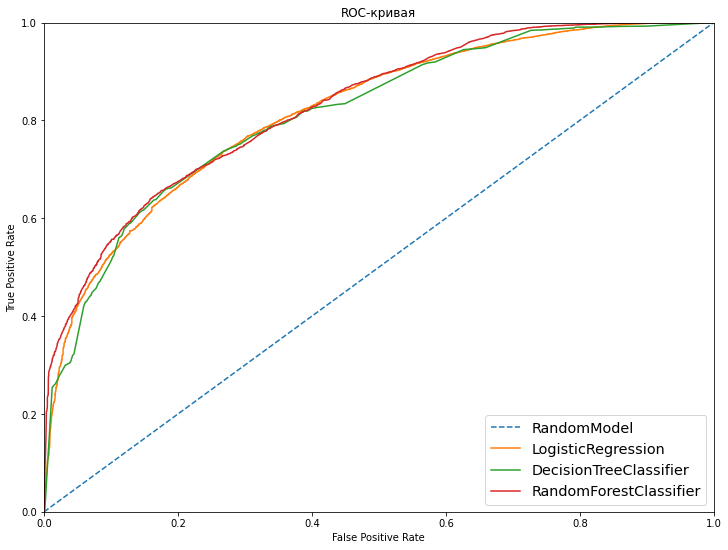

In [71]:
plt.figure(figsize=[12,9])

plt.plot([0, 1], [0, 1], linestyle='--', label='RandomModel')

fpr, tpr, thresholds = roc_curve(target_test, lg_auc.predict_proba(features_test)[:, 1])
print('AUC-ROC LogisticRegression:',roc_auc_score(target_test,  lg_auc.predict_proba(features_test)[:, 1]))
plt.plot(fpr, tpr, label='LogisticRegression')

fpr, tpr, thresholds = roc_curve(target_test,  dt_auc.predict_proba(features_test)[:, 1])
print('AUC-ROC DecisionTreeClassifier:',roc_auc_score(target_test,  dt_auc.predict_proba(features_test)[:, 1]))
plt.plot(fpr, tpr, label='DecisionTreeClassifier')

fpr, tpr, thresholds = roc_curve(target_test, rf_auc.predict_proba(features_test)[:, 1])
print('AUC-ROC RandomForestClassifier:',roc_auc_score(target_test,  rf_auc.predict_proba(features_test)[:, 1]))
plt.plot(fpr, tpr, label='RandomForestClassifier')

plt.xlim([0,1])
plt.ylim([0,1])

plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")

plt.legend(loc='lower right', fontsize='x-large')

plt.title("ROC-кривая")
plt.show()

Все метрики уместим в одной компактной таблице.

In [72]:
best_metrics = pd.DataFrame(data=[('Logistic Regression', round(accuracy_score(target_test, predictions_test_lg), 3), 
                                  round(f1_score(target_test, predictions_test_lg), 3), 
                                  round(roc_auc_score(target_test, lg_auc.predict_proba(features_test)[:, 1]), 3),
                                  round(precision_score(target_test, predictions_test_lg), 3), 
                                  round(recall_score(target_test, predictions_test_lg), 3)),
                                 ('Decision Tree', round(accuracy_score(target_test, predictions_test_dt), 3), 
                                  round(f1_score(target_test, predictions_test_dt), 3), 
                                  round(roc_auc_score(target_test, dt_auc.predict_proba(features_test)[:, 1]), 3),
                                  round(precision_score(target_test, predictions_test_dt), 3), 
                                  round(recall_score(target_test, predictions_test_dt), 3)), 
                                 ('Random Forest', round(accuracy_score(target_test, predictions_test_rf), 3), 
                                  round(f1_score(target_test, predictions_test_rf), 3), 
                                  round(roc_auc_score(target_test, rf_auc.predict_proba(features_test)[:, 1]), 3),
                                  round(precision_score(target_test, predictions_test_rf), 3), 
                                  round(recall_score(target_test, predictions_test_rf), 3))],
                                 columns=['model', 'accuracy', 'f1', 'roc_auc', 'precision', 'recall'])
best_metrics

,model,accuracy,f1,roc_auc,precision,recall
0,Logistic Regression,0.755,0.620,0.818,0.780,0.514
1,Decision Tree,0.760,0.666,0.814,0.725,0.616
2,Random Forest,0.763,0.670,0.828,0.731,0.618


Все модели адекватны. Модель, обеспечивающая наивысший показатель точности тестирования, - это модель "Случайный Лес". Высокое значение AUC-ROC говорит о том, что модель хорошо ранжировала объекты. Метрики `precision` и `recall` наивысшие.

##### Confusion Matrix выбранной модели

In [73]:
cm_rf = confusion_matrix(target_test, predictions_test_rf)

In [74]:
cm_df_rf = pd.DataFrame(cm_rf, 
                        index=['Actually Not Canceled', 'Actually Canceled'], 
                        columns=['Predicted Not Canceled', 'Predicted Canceled'])

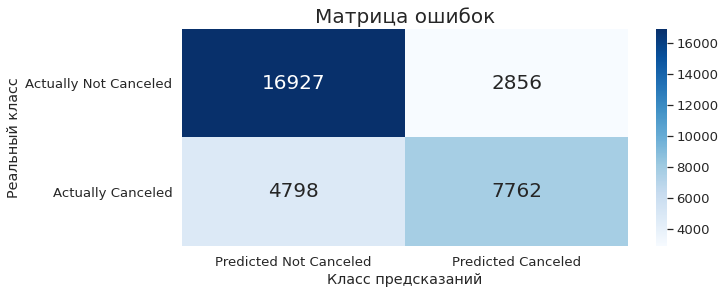

In [75]:
sns.set(font_scale=1.2)
plt.figure(figsize=(10,4))
    
sns.heatmap(cm_rf, annot=True, fmt='g', cmap="Blues",
            xticklabels=cm_df_rf.columns, 
            yticklabels=cm_df_rf.index, 
            annot_kws={"size": 20})
plt.title("Матрица ошибок", size=20)
plt.xlabel('Класс предсказаний')
plt.ylabel('Реальный класс');

In [76]:
TP = cm_rf[0][0]
TN = cm_rf[1][1]
FP = cm_rf[0][1]
FN = cm_rf[1][0]
total = cm_rf[0][0]+cm_rf[1][1]+cm_rf[0][1]+cm_rf[1][0]

print('Всего предсказаний:',total)
print(f'Правильно классифицированные: {np.round((TP+TN)/total*100)}%')
print(f'Правильно классифицированные отмененные бронирования: {np.round(TP/(TP+FN)*100)}%')
print(f'Правильно классифицированые не отмененные бронирования: {np.round(TN/(TN+FP)*100)}%')
print(f'Прогнозируемые отмененные бронирования, которые на самом деле отменены: {np.round(TP/(TP+FP)*100)}%')
print(f'Прогнозируемые не отмененные бронирования, которые на самом деле не отменены: {np.round(TN/(TN+FN)*100)}%')

Всего предсказаний: 32343
Правильно классифицированные: 76.0%
Правильно классифицированные отмененные бронирования: 78.0%
Правильно классифицированые не отмененные бронирования: 73.0%
Прогнозируемые отмененные бронирования, которые на самом деле отменены: 86.0%
Прогнозируемые не отмененные бронирования, которые на самом деле не отменены: 62.0%


Всего предсказаний: 32343. Глядя на матрицу ошибок, мы видим, что существует 2856 бронирований, которые, согласно нашей модели, должны были быть отменены, но на самом деле не были отменены. Это означает, что в 9 % случаев гость может прибыть, и отель может быть не готов к их приему, или отель может рискнуть перебронировать, если они искали нового гостя.  
Кроме того, есть 4798 бронирований, которые, по прогнозам нашей модели, не будут отменены, которые на самом деле были отменены. Это означает, что в 15 % случаев отель может выделять свои ресурсы на неправильное бронирование (подготавливать номер, в котором нет необходимости, или упускать возможность найти нового гостя).

Для повышения точности предсказания отмены бронирования минимизируем ошибку первого рода(растет `precision`), для минимизации убытков - минимизировать ошибку 2-го рода(увеличение `recall`). Поиск информации о приемлемом уровне допустимости ничего не дал, чем меньше - тем лучше в нашем варианте.


#### Экономическая модель. Сравнение

Оценим выручку после обучения моделей с внедрением депозитов:

In [77]:
predictions = [('predictions_test_lg', predictions_test_lg), 
               ('predictions_test_dt', predictions_test_dt), 
               ('predictions_test_rf', predictions_test_rf)]
for name, prediction in predictions:
    series = pd.Series(prediction).to_frame()
    series.columns = [name]
    hc_profit = hc_profit.merge(series, how='left', left_index=True, right_index=True)

In [78]:
def predicted_profit(data, col):
    if data['is_canceled'] == 0:
        income = data['price_per_night'] * data['koeff'] * data['total_nights']
        expenses = data['service_price'] * (1 + data['total_nights'] // 2)
    elif (data['is_canceled'] == 1) and (data[col] == 0):
        income = 0
        expenses = data['service_price'] + (data['price_per_night'] * data['koeff'])
    elif (data['is_canceled'] == 1) and (data[col] == 1):
        income = (data['price_per_night'] * data['koeff'] * .8) + (data['service_price'] * .8)
        expenses = data['service_price'] + (data['price_per_night'] * data['koeff'])
    profit = income - expenses
    return profit

In [79]:
for new_col, col in [('profit_lg', 'predictions_test_lg'), 
                     ('profit_dt', 'predictions_test_dt'), 
                     ('profit_rf', 'predictions_test_rf')]:
    hc_profit[new_col] = hc_profit.apply(predicted_profit, col=col, axis=1)

In [80]:
display(hc_profit)

,is_canceled,arrival_date_month,reserved_room_type,total_nights,price_per_night,service_price,koeff,total_profit,predictions_test_lg,predictions_test_dt,predictions_test_rf,profit_lg,profit_dt,profit_rf
0,1,January,A,1,1000,400,1.0,-1400.0,1,1,1,-280.0,-280.0,-280.0
1,1,January,A,4,1000,400,1.0,-1400.0,0,0,0,-1400.0,-1400.0,-1400.0
2,1,January,A,4,1000,400,1.0,-1400.0,0,0,0,-1400.0,-1400.0,-1400.0
3,1,January,A,4,1000,400,1.0,-1400.0,0,1,1,-1400.0,-280.0,-280.0
4,1,January,A,7,1000,400,1.0,-1400.0,1,1,1,-280.0,-280.0,-280.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32338,0,August,A,6,1000,400,1.4,6800.0,0,0,0,6800.0,6800.0,6800.0
32339,0,August,A,7,1000,400,1.4,8200.0,0,0,0,8200.0,8200.0,8200.0
32340,0,August,A,7,1000,400,1.4,8200.0,0,1,1,8200.0,8200.0,8200.0
32341,0,August,D,7,550,150,1.4,4790.0,0,0,0,4790.0,4790.0,4790.0


In [81]:
print('Прибыль после обучения LR:', (hc_profit['profit_lg'].sum())/1000000, 'млн.руб.')
print('Прибыль после обучения DT:', (hc_profit['profit_dt'].sum())/1000000, 'млн.руб.')
print('Прибыль после обучения RF:', (hc_profit['profit_rf'].sum())/1000000, 'млн.руб.')

Прибыль после обучения LR: 40.218198 млн.руб.
Прибыль после обучения DT: 41.631942 млн.руб.
Прибыль после обучения RF: 41.611702 млн.руб.


In [82]:
print('Прибыль от использования LR увеличилась на:', 
      (hc_profit['profit_lg'].sum() - hc_profit['total_profit'].sum())/1000000, 'млн.руб.')
print('Прибыль от использования DT увеличилась на:', 
      (hc_profit['profit_dt'].sum() - hc_profit['total_profit'].sum())/1000000, 'млн.руб.')
print('Прибыль от использования RF увеличилась на:', 
      (hc_profit['profit_rf'].sum() - hc_profit['total_profit'].sum())/1000000, 'млн.руб.')

Прибыль от использования LR увеличилась на: 7.707608 млн.руб.
Прибыль от использования DT увеличилась на: 9.121352 млн.руб.
Прибыль от использования RF увеличилась на: 9.101112 млн.руб.


Разность в прибыли между моделями DecisionTreeClassifier и RandomForestClassifier составила менее 0.3 %. Обе модели за отчетный период принесут дополнительную прибыль свыше 9 млн.руб., которая полностью перекрывает затраты в 400_000 руб на ее разработку.

#### Вывод:
Все построенные модели дали приблизительно одинаковые результаты на тестовой выборке. При прогнозировани отмены бронирования отелей наилучшей моделью должна быть модель с наибольшим `precision`. Метрика `precision` показывает долю
объектов, названных классификатором положительными и при этом действительно являющихся положительными: отелю будет важно
получить как можно более точное число отмененных бронирований, чтобы грамотно распределить ресурсы. В наших моделях наилучшей моделью по этому показателю является модель LogisticRegression. Однако у этой модели самый маленький `recall`, что приводит к увеличению убытков. Что и показал расчет прибыли.( у Логистической регресии прибыль наименьшая). Поэтому наилучшей сбалансированной моделью по метрикам будет случайный лес (Random Forest), демонстрирующий наибольшие значения `recall`, `accuracy`, `F-меры` и `площади AUC под ROC-кривой`, а так же отличный показатель `pricision` среди моделей.

In [83]:
#Задаем настройки таблиц
colors = sns.color_palette('pastel')
sns.set(rc={'figure.figsize':(15, 5)}, palette=colors)

### Шаг 5. Опишите портрет «ненадёжного» клиента

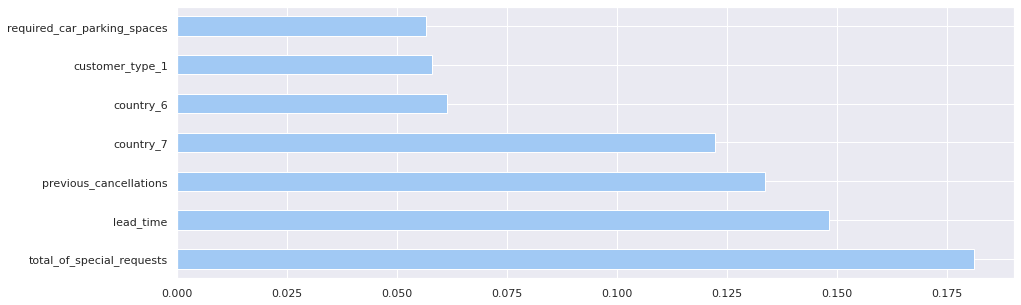

In [84]:
#Посмотрим, какие признаки выделила наша модель
feat_importances = pd.Series((rf_gs.best_estimator_.feature_importances_), index=features_train.columns)
feat_importances.nlargest(7).plot(kind='barh')
plt.show()

In [85]:
#Проверим корреляцию между признаками к целевому признаку на обобщенном датафрейме
hotel_concat = pd.concat([hc_train, hc_test])
#sns.heatmap(hotel_concat.corr()[['is_canceled']].sort_values('is_canceled', ascending=False),
#                annot = True, annot_kws = {"size":12}, cmap='Blues')
#plt.title('Сводная корреляция к целевому признаку')
#plt.show()

Среди количественных признаков выделены следующие зависимости, на которые обратила внимание модель, по убыванию значимости:

- количество специальных отметок - обратная зависимость. Наличие специальных отметок снижает вероятность отмены брони. Клиенты, оставляющие специальные отметки или пожелания, больше заинтересованы в том, чтобы снять номер
- количество дней между датой бронирования и датой прибытия - чем больше времени между бронированием и выездом, тем выше вероятность отказа. Слишком большое время для отмены брони, может всякое произойти.
- количество отменённых заказов у клиента - если у клиента уже есть в истории отмены брони, то есть и вероятность отказа и в будущем. У клиента наблюдается модус поведения.
- необходимость места для автомобиля- обратная зависимость. Если клиент при бронировании указывает на необходимость парковочного места, то вероятность отказа от бронирования ниже. Путешествие на автомобиле реже отменяется.

Категориальные признаки и их зависимости.

In [86]:
#Отключаем автопрокрутку:
#%%javascript
#IPython.OutputArea.prototype._should_scroll = function(lines) {
#    return false;
#}

In [87]:
#Добавим к рассматриваемому датасету столбец с предсказаниями, чтобы делать сравнительные таблицы
prediction_rf = pd.Series(predictions_test_rf).to_frame()
prediction_rf.columns = ['predictions_test_rf']
hc_test_end = hc_test.merge(prediction_rf, left_index=True, right_index=True)
hc_test_end

,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,booking_changes,days_in_waiting_list,customer_type,required_car_parking_spaces,total_of_special_requests,total_nights,predictions_test_rf
0,1,74.0,2017,January,1,1,1,0,2.0,0.0,0.0,BB,PRT,TA/TO,0,0,0,A,0,0,Transient,0,0,1,1
1,1,62.0,2017,January,1,1,2,2,2.0,0.0,0.0,BB,AUT,TA/TO,0,0,0,A,0,0,Transient,0,1,4,0
2,1,62.0,2017,January,1,1,2,2,2.0,0.0,0.0,BB,AUT,TA/TO,0,0,0,A,0,0,Transient,0,1,4,0
3,1,71.0,2017,January,1,1,2,2,1.0,0.0,0.0,BB,PRT,TA/TO,0,0,0,A,0,0,Transient,0,1,4,1
4,1,172.0,2017,January,1,1,2,5,2.0,0.0,0.0,BB,BEL,TA/TO,0,0,0,A,0,0,Transient,0,0,7,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32338,0,164.0,2017,August,35,31,2,4,2.0,0.0,0.0,BB,DEU,TA/TO,0,0,0,A,0,0,Transient,0,0,6,0
32339,0,21.0,2017,August,35,30,2,5,2.0,0.0,0.0,BB,BEL,TA/TO,0,0,0,A,0,0,Transient,0,2,7,0
32340,0,23.0,2017,August,35,30,2,5,2.0,0.0,0.0,BB,BEL,TA/TO,0,0,0,A,0,0,Transient,0,0,7,1
32341,0,34.0,2017,August,35,31,2,5,2.0,0.0,0.0,BB,DEU,TA/TO,0,0,0,D,0,0,Transient,0,4,7,0


In [88]:
#Создадим функцию для сравнения кат признаков относительно фактическому и предсказанному целевому признаку
def cat_comparison(column):
    fig, ax = plt.subplots(1, 2, sharex=True, sharey=True)
    fig.suptitle(f'Сравнение зависимости отмены бронирования от категорий {column}', fontweight="bold")
    sns.barplot(data=hc_test_end, x=column, y='is_canceled', ax=ax[0])
    ax[0].set_title('Фактические отмены')
    ax[0].set_xlabel('Категории')
    ax[0].set_ylabel('Зависимость целевого признака')
    sns.barplot(data=hc_test_end, x=column, y='predictions_test_rf', ax=ax[1])
    ax[1].set_title('Предсказанные отмены')
    ax[1].set_xlabel('Категории')
    ax[1].set_ylabel('Зависимость целевого признака')
    plt.show()
    val_counts = hc_train.value_counts(column).to_frame()
    val_counts.columns = ['share']
    val_counts['share'] = (val_counts['share'] / val_counts['share'].sum()).apply(lambda x: '{0:.2%}'.format(x))
    display(val_counts)

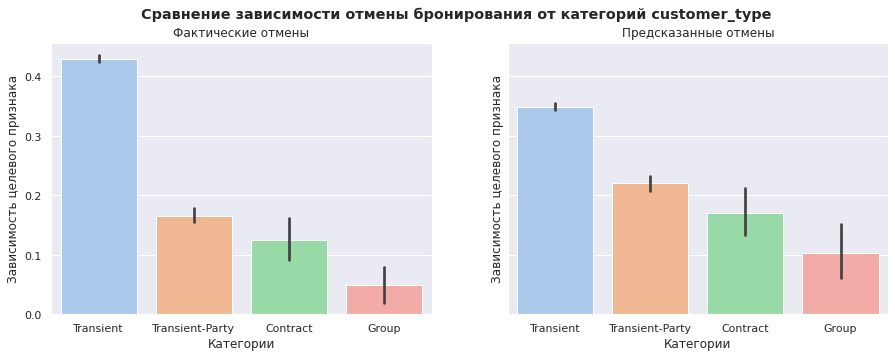

,share
customer_type,
Transient,69.78%
Transient-Party,25.56%
Contract,4.22%
Group,0.44%


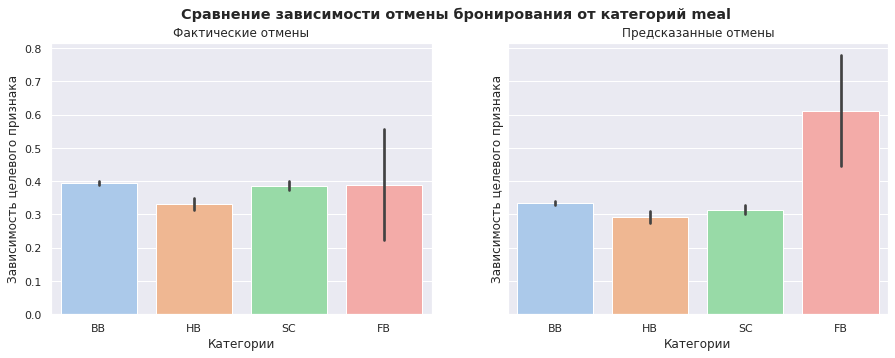

,share
meal,
BB,79.22%
HB,11.20%
SC,8.88%
FB,0.69%


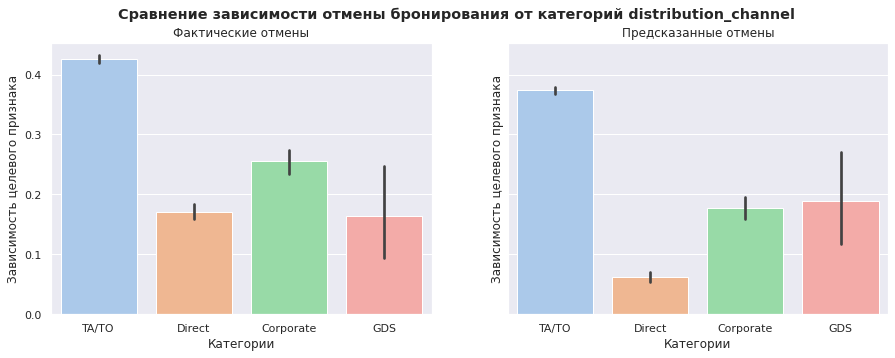

,share
distribution_channel,
TA/TO,83.48%
Direct,10.50%
Corporate,5.87%
GDS,0.15%


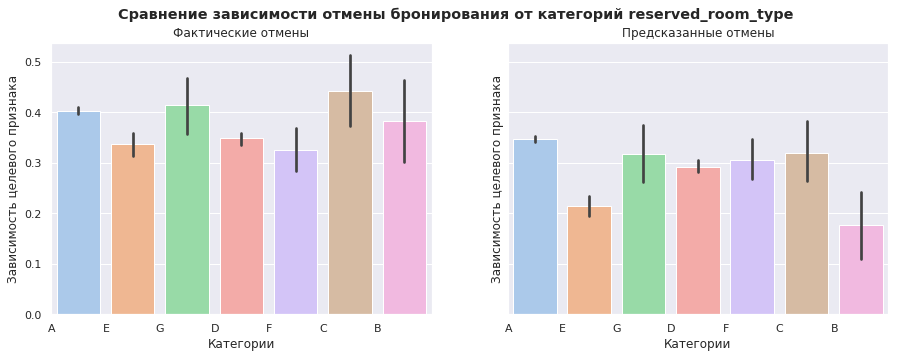

,share
reserved_room_type,
A,77.60%
D,14.42%
E,3.76%
F,1.86%
B,1.10%
G,0.91%
C,0.35%


In [89]:
cols = ['customer_type', 'meal', 'distribution_channel', 'reserved_room_type']
for col in cols:
    cat_comparison(col)

Выводы по категориальным столбцам:

- По типу заказчика больше всех отменяет категория Transient.
- По категориям meal у нас нет особых скачков, все категории где-то на уровне 0,4. Модель отдала предпочтение категории FB, что также незначительно, тк она занимает менее 2% и вряд ли способна навредить метрикам предсказаний.
- По категориям distribution_channel выделяются TA/TO и Corporate. Что касается модели, то наблюдается та же картина, что и в предыдущих категориях - заметен скачок на категории GDS, которая занимает менее 1%.
- По reserved_room_type мы уже отмечали, что отменяют в основном категории А, C, B, G. Модель в общих чертах воспроизвела эти зависимости.

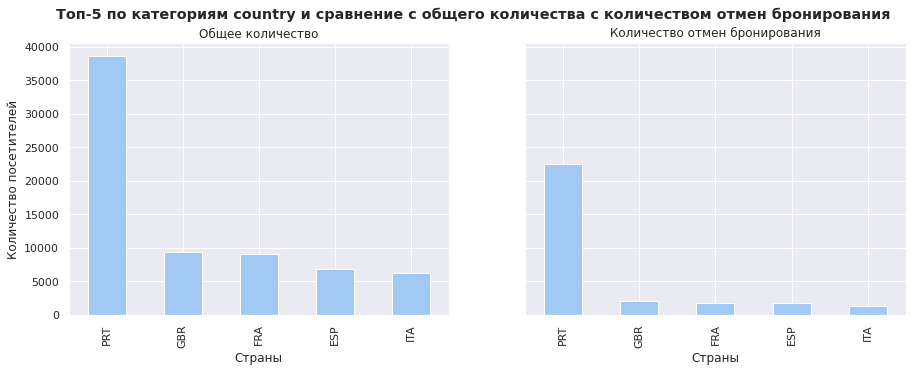

In [90]:
fig, ax = plt.subplots(1, 2, sharex=True, sharey=True)
fig.suptitle('Топ-5 по категориям country и сравнение с общего количества с количеством отмен бронирования', fontweight="bold")
hotel_concat.value_counts('country').nlargest(5).plot(kind='bar', ax=ax[0])
ax[0].set_title('Общее количество')
ax[0].set_xlabel('Страны')
ax[0].set_ylabel('Количество посетителей')
hotel_concat.query('is_canceled == 1')['country'].value_counts().nlargest(5).plot(kind='bar', ax=ax[1])
ax[1].set_title('Количество отмен бронирования')
ax[1].set_xlabel('Страны')
plt.show()

Среди количественных признаков выделены следующие зависимости, на которые обратила внимание модель, по убыванию значимости:
- гражданство постояльца - при принадлежности клиента к гражданству Португалии (около половины из них отменяют бронь) и Великобритании увеличивает вероятность отказа от брони.
- тип заказчика - больше всех отменяет категория Transient (не связано с договором с юридическим лицомили групповым заездом).
- канал дистрибуции заказа - канал TA/TO имеет большую вероятность отказа брони.

**ВЫВОД**  

Признаки имеющие наибольшее влияние на образ «ненадёжного» клиента, по убыванию:

- `total_of_special_requests` -  количество специальных отметок - Клиент не оставляющий специальные отметки или пожелания.
- `lead_time` - количество дней между датой бронирования и датой прибытия - Клиент бронирующий задолго до заезда.
- `previous_cancellations` - Клиент уже отказывался от брони.
- `country` - гражданство постояльца - Клиента с гражданством Португалии (около половины из них отменяют бронь) и Великобритании.
- `customer_type` - тип заказчика - Клиент категория Transient (не связано с договором с юридическим лицом или групповым заездом).
- `required_car_parking_spaces`-  необходимость места для автомобиля - Клиенту при бронировании не ужно парковочное место.
- `distribution_channel` - канал дистрибуции заказа - клиент бронирующий по каналу TA/TO.

### Шаг 6. Напишите общий вывод

1.В датафрейме hc_train 25 столбцов и 65229 записей. Датасет содержит данные для обучения модели.
В датафрейме hc_text 25 столбцов и 32412 записей. Датасет содержит данные для тестирования модели:
Столбцы датафрейма имеют тип object, int64 и float64

-  Исследовательский анализ целевого признака:

- В тренеровочной выборке данные за два года 2015 и 2016. В тестовой выборке за 8 месяцев 2017 года.
- в целевом признаке `is_canseled` на тренировачном датасете отказов 36.9%, на тестовом датафрейме 38.8%
- Явных дубликатов нет.
- Пропусков в датасетах нет.
- Среднее время между бронированием и заездом составляет чуть более трех месяцев( на train - 96 дней, на test - 98 дней)
- В обеих выборках имеются брони без взрослых(169 и 69 соответственно) выбросы/ошибки в данных. Удалили.
- В тренеровочной выборке в столбце `babies` (дети до 3 лет) есть брони с 10-ю и 9-ю детьми. Ясли на выезде? Такого явно не бывает на одну бронь. Явные выбросы/ошибки. Удалили.
- Удаление выбросов/ ошибок сократило наши датасеты на 0.3%.
- В столбце `meal` в обеих выборках выявлен не явный дубликат. `SC` и `SC_` лишний пробел. Поправили.
- Топ три постояльцев в обех выборках имею гражданство Португалии, Великобритании и Франции. В обеих выборках свыше 30%  от общего числа клиентов - граждане Португалии.
- В более 70% процентов случаев клиент бронирует номера категории А в обеих выборках.
- В большинстве случаев (70% и 85% для выборок соответственно) тип заказчика не связан с договором или групповым заездом.
- В 95% случаев клиенту не нужно парковочное место.
- Средне арифметическая бронь клиента - на 3 ночи.
- Столбец `id`- номер записи - никакой информативности не несет. Удаляем его.  


2.Разработка модели ML:  

В процессе подготовки данных:  
    - маштабировали данные  
    - провели категоризацию признаков:

Были обучены модели методами:
 - Логистическая Регрессия(roc_auc=0.818)
 - Дерево Решений (roc_auc=0.814)
 - Случайный Лес(roc_auc=0.828)

В ходе сравнения полученных моделей определено, что модель случайного леса (Random Forest - оптимальные параметры: 'class_weight': 'balanced', 'criterion': 'gini', 'max_depth': 8, 'min_samples_leaf': 5, 'n_estimators': 10)   

 - accuracy = 0.763  
 - f1       = 0.67  
 - roc_auc  = 0.828
 - presicion= 0.731
 - recall   = 0.618  
 
наилучшим образом предсказывает отмену бронирования отеля, максимально минимизирующая убытки бизнес-задачи. На тестовой выборке данная модель показала 76,3 % правильных ответов среди всех прогнозов, а значение метрики precision составило 73,1 %. Модель «покрыла» все действительно отмененные бронирования на 61,8%. Модель хорошо ранжирует объекты.
 
  - Построенна матрица ошибок для выбранной модели:  
 
Всего предсказаний: 32343  
Правильно классифицированные: 76.0%  
Правильно классифицированные отмененные бронирования: 78.0%  
Правильно классифицированые не отмененные бронирования: 73.0%  
Прогнозируемые отмененные бронирования, которые на самом деле отменены: 86.0%  
Прогнозируемые не отмененные бронирования, которые на самом деле не отменены: 62.0%  
Глядя на матрицу ошибок, мы видим, что существует 2856 бронирований, которые, согласно нашей модели, должны были быть отменены, но на самом деле не были отменены. Это означает, что в 9 % случаев гость может прибыть, и отель может быть не готов к их приему, или отель может рискнуть перебронировать, если они искали нового гостя.  
Кроме того, есть 4798 бронирований, которые, по прогнозам нашей модели, не будут отменены, которые на самом деле были отменены. Это означает, что в 15 % случаев отель может выделять свои ресурсы на неправильное бронирование (подготавливать номер, в котором нет необходимости, или упускать возможность найти нового гостя).  

Прибыль с января по август 2017 г. : 32.51059 млн.руб.  
Прибыль после обучения модели Random Forest: 41.611702 млн.руб.  

Random Forest увеличит компании прибыль на 9.101112 млн.руб, что точно окупит затраты на разработку системы прогнозирования, равные 400 тыс.руб.  

3.Признаки имеющие наибольшее влияние на **образ «ненадёжного» клиента**, по убыванию:

- Клиент не оставляющий специальные отметки или пожелания - `total_of_special_requests` -  количество специальных отметок. 
- Клиент бронирующий задолго до заезда - `lead_time` - количество дней между датой бронирования и датой прибытия.
- Клиент уже отказывался от брони - `previous_cancellations` - количество отменённых заказов у клиента.
- Клиента с гражданством Португалии (около половины из них отменяют бронь) и Великобритании -`country`- гражданство постояльца. 
- Клиент категория Transient (не связано с договором с юридическим лицом или групповым заездом)-`customer_type`- тип заказчика. 
- Клиенту при бронировании не ужно парковочное место -`required_car_parking_spaces`-  необходимость места для автомобиля.
- Rлиент бронирующий по каналу TA/TO. `distribution_channel` - канал дистрибуции заказа. 